In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

ed_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = ed_df["STATE"].unique()

for state in states:
    ed_df.loc[ed_df["STATE"] == state, fill_list] = ed_df.loc[ed_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
ed_df.dropna(inplace=True)

### 1: Derive the descriptive statistics of the data and discuss the points that you think remarkable.


In [5]:
# get univariate statistics
ed_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


In [4]:
# descriptive statistics for just text-based variables
ed_df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,466,466
unique,465,51
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA
freq,2,11


In [6]:
# descriptive statistics for all variables
ed_df.describe(include= 'all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466,466,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
unique,465,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,NaN,NaN,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,NaN,NaN,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,NaN,NaN,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,NaN,NaN,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,NaN,NaN,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884


- The data indicates the average TOTAL_REVENUE is less that the average TOTAL_EXPENDITURE, we can see that the state's budget opperate at a defict on education on average.
- The data also shows us that half of the TOTAL_EXPENDITURE is made up of INSTRUCTION_EXPENDITURE.
- We see that FEDERAL_REVENUE is the leading source of revenue on average.
- We see that the average recorded scores in math are higher than the avergae scores in reading, math scores also have a greater standard deviation than the reading scores.

### 5: Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and informations around those dates.


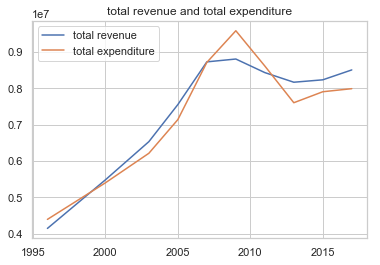

In [9]:
plt.plot(ed_df.loc[ed_df.STATE == "ARIZONA", "YEAR"],
         ed_df.loc[ed_df.STATE == "ARIZONA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(ed_df.loc[ed_df.STATE == "ARIZONA", "YEAR"],
         ed_df.loc[ed_df.STATE == "ARIZONA", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

Text(0.5, 0, 'Year')

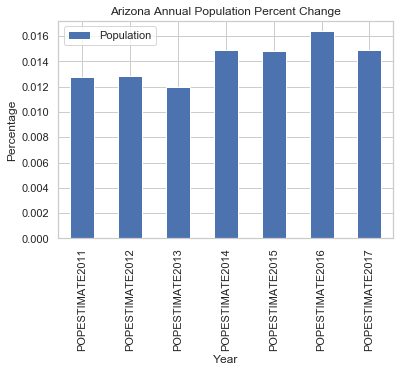

In [11]:
df_US = pd.read_csv('nst-est2018-alldata.csv', sep=',') 

df_US_annual_population = df_US[['NAME','CENSUS2010POP','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013',
                                 'POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017',
                                 'POPESTIMATE2018']]
                                                            # create a data frame of AZ annual population estimates
df_AZ_population = df_US_annual_population[df_US_annual_population['NAME'] == 'Arizona']
df_AZ_pop = df_AZ_population.T
df_AZ_pop.columns = ['Population']
df_AZ_pop = df_AZ_pop.iloc[1:9]
df_AZ_pop_pct_changes = df_AZ_pop.pct_change() # take a profile of the AZ population change as a percent change 
                                               # from the previous year 
df_AZ_pop_pct_changes_no2010 = df_AZ_pop_pct_changes.iloc[1:9,:]
df_AZ_pop_pct_changes_no2010.plot.bar()
plt.title('Arizona Annual Population Percent Change') 
plt.ylabel('Percentage')
plt.xlabel('Year')
#print(df_AZ_pop_pct_changes_no2010)



- The data shows a harsh peak right before the market crash in 2008 on the revenue line, and an even sharper peak after 2008 on the expenditure line. 
- Comparing the popualtion growth trend from 2010 forwards we see that the revenue line follows the annual population growth trend very closely. 

### 3: In your chosen state, which one of the lessons the students are more successful, math or reading?

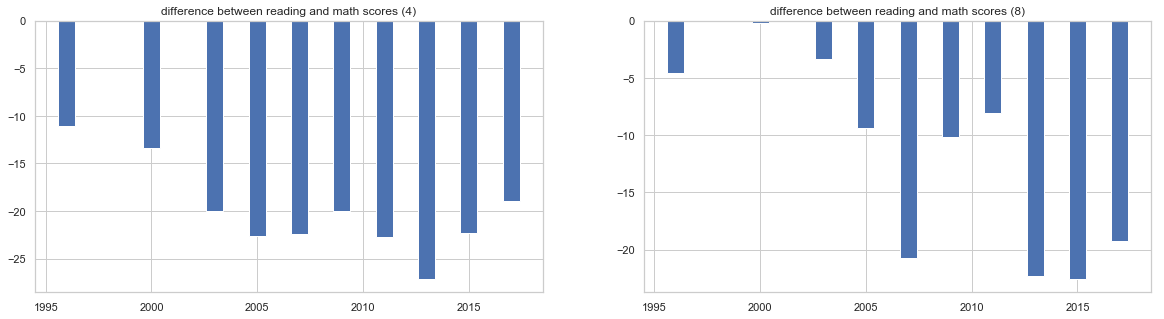

difference between reading and math scores (4)
211    -11.046152
418    -13.419344
574    -20.038595
678    -22.657936
782    -22.416309
889    -20.001836
995    -22.762547
1099   -27.170780
1201   -22.300419
1449   -18.969836
dtype: float64
difference between reading and math scores (8)
211     -4.591197
418     -0.195967
574     -3.368384
678     -9.357312
782    -20.748679
889    -10.165252
995     -8.067329
1099   -22.294430
1201   -22.602471
1449   -19.290689
dtype: float64


In [15]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(ed_df.loc[ed_df.STATE == "ARIZONA", "YEAR"],
         ed_df.loc[ed_df.STATE == "ARIZONA", "AVG_READING_4_SCORE"] - ed_df.loc[ed_df.STATE == "ARIZONA", "AVG_MATH_4_SCORE"])

plt.title("difference between reading and math scores (4)")

plt.subplot(1,2,2)
plt.bar(ed_df.loc[ed_df.STATE == "ARIZONA", "YEAR"],
         ed_df.loc[ed_df.STATE == "ARIZONA", "AVG_READING_8_SCORE"] - ed_df.loc[ed_df.STATE == "ARIZONA", "AVG_MATH_8_SCORE"])

plt.title("difference between reading and math scores (8)")

plt.show()

print("difference between reading and math scores (4)")
print(ed_df.loc[ed_df.STATE == "ARIZONA", "AVG_READING_4_SCORE"] - ed_df.loc[ed_df.STATE == "ARIZONA", "AVG_MATH_4_SCORE"])
print("difference between reading and math scores (8)")
print(ed_df.loc[ed_df.STATE == "ARIZONA", "AVG_READING_8_SCORE"] - ed_df.loc[ed_df.STATE == "ARIZONA", "AVG_MATH_8_SCORE"])


- In Arizona, the students overall score higher in mathematics. 

### 4: What are the distributions of the math and reading scores in the sample?

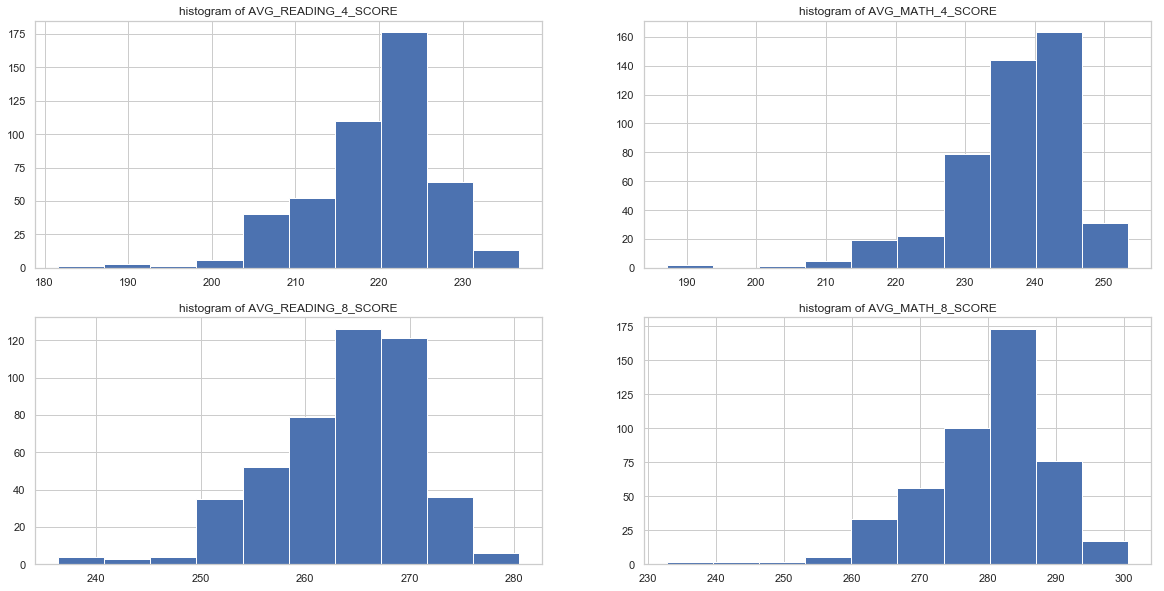

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(ed_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(ed_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(ed_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(ed_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

- The scores are not normally distributed and are slightly skew left, thi would indicate that the average score is lower than themedian score.

### 5: Notice that there are too many missing values for math and reading scores. Fill out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.


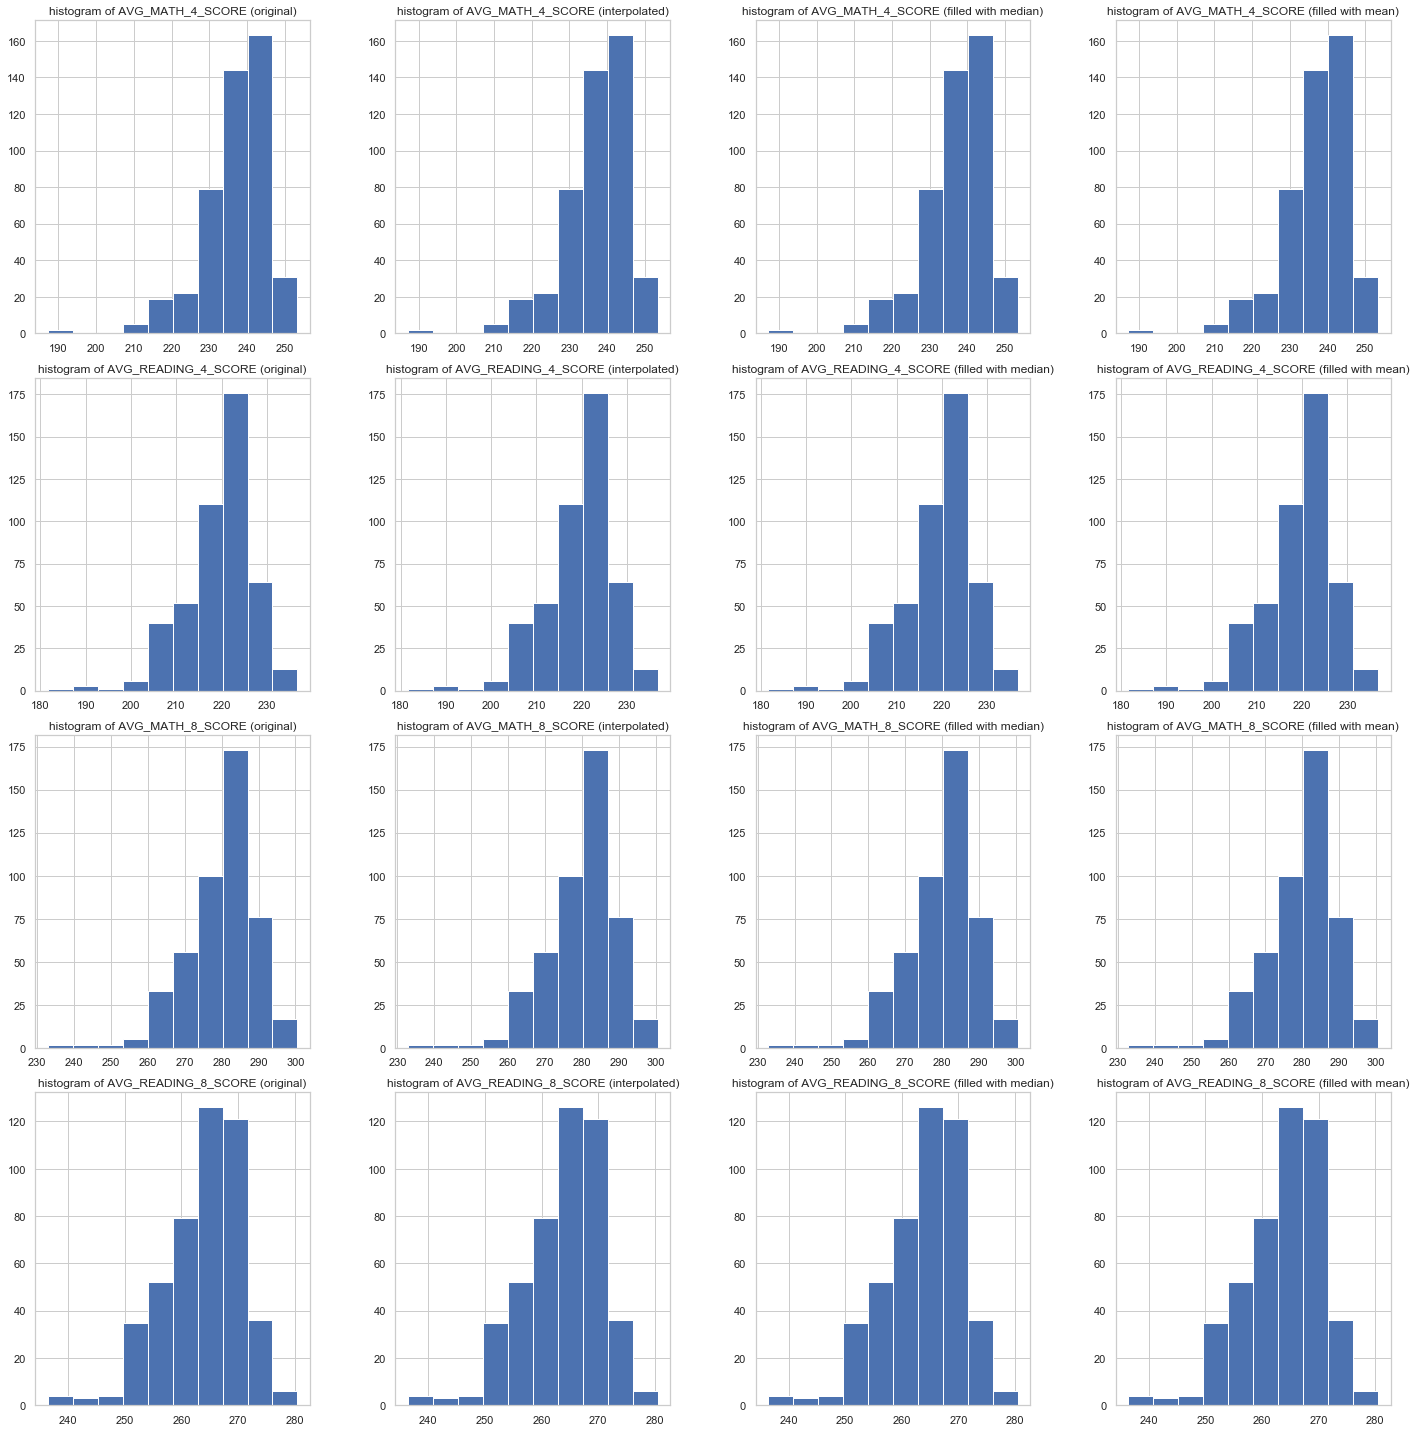

In [21]:
plt.figure(figsize=(20,20))

# AVG_MATH_4_SCORE
# drop rows with missing(na) data 
plt.subplot(4,4,1)
plt.hist(ed_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

# fill missing scores with interpolated data
plt.subplot(4,4,2)
plt.hist(ed_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_4_SCORE"))

# fill missing scores with median data
plt.subplot(4,4,3)
plt.hist(ed_df.AVG_MATH_4_SCORE.fillna(ed_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

# fill missing scores with mean data 
plt.subplot(4,4,4)
plt.hist(ed_df.AVG_MATH_4_SCORE.fillna(ed_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))

# AVG_READING_4
# drop rows with missing(na) data 
plt.subplot(4,4,5)
plt.hist(ed_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

# fill missing scores with interpolated data
plt.subplot(4,4,6)
plt.hist(ed_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

# fill missing scores with median data
plt.subplot(4,4,7)
plt.hist(ed_df.AVG_READING_4_SCORE.fillna(ed_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

# fill missing scores with mean data
plt.subplot(4,4,8)
plt.hist(ed_df.AVG_READING_4_SCORE.fillna(ed_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))

# AVG_MATH_8_SCORE
# drop rows with missing(na) data
plt.subplot(4,4,9)
plt.hist(ed_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

# fill missing scores with interpolated data
plt.subplot(4,4,10)
plt.hist(ed_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

# fill missing scores with median data
plt.subplot(4,4,11)
plt.hist(ed_df.AVG_MATH_8_SCORE.fillna(ed_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

# fill missing scores with mean data
plt.subplot(4,4,12)
plt.hist(ed_df.AVG_MATH_8_SCORE.fillna(ed_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))

# AVG_READING_8
# drop rows with missing(na) data
plt.subplot(4,4,13)
plt.hist(ed_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

# fill missing scores with interpolated data
plt.subplot(4,4,14)
plt.hist(ed_df.AVG_READING_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

# fill missing scores with median data
plt.subplot(4,4,15)
plt.hist(ed_df.AVG_READING_8_SCORE.fillna(ed_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

# fill missing scores with mean data
plt.subplot(4,4,16)
plt.hist(ed_df.AVG_READING_8_SCORE.fillna(ed_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

The filling methods change the distribtion of the data to varying degree. In this case, filling missing values with mean or median data has the strongest effect. It may be a result of the missing values contained in the original data set.
To retain the most similar distribution to the original data set, we may interpolate the data to fill the missing values or delete the rows with missing data entirely.
